<a href="https://colab.research.google.com/github/ai7dnn/2024-1-BDA/blob/main/inclass/06w_lect_ch07_missingvalue_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 그래프 해상도 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})
%config InlineBackend.figure_format = 'retina'

---

# 07 데이터 정제  - 빠진 데이터, 이상한 데이터 제거하기

## 07-1 빠진 데이터를 찾아라! - 결측치 정제하기

### 결측치 찾기

#### 결측치 만들기

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [2]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

#### 결측치 확인하기

In [3]:
pd.isna(df)  # 결측치 확인

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [4]:
pd.isnull(df)  # 결측치 확인

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [5]:
pd.isna(df).sum()  # 결측치 빈도 확인

sex      1
score    1
dtype: int64

In [6]:
pd.isna(df).sum(axis=1)  # 결측치 빈도 확인

0    0
1    0
2    1
3    0
4    1
dtype: int64

In [9]:
s = pd.Series([True, False, True])
s

0     True
1    False
2     True
dtype: bool

In [10]:
s.sum()

2

In [11]:
s.any()

True

In [12]:
s.all()

False

In [13]:
df.isnull().any()

sex      True
score    True
dtype: bool

In [14]:
df.isna().any()

sex      True
score    True
dtype: bool

In [15]:
df.notnull()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [16]:
df.notnull().all()

sex      False
score    False
dtype: bool

In [18]:
df.notna().any()

sex      True
score    True
dtype: bool

In [19]:
df.notna().all()

sex      False
score    False
dtype: bool

In [ ]:
df.isna().all()

sex      False
score    False
dtype: bool

In [ ]:
df.isna().any(axis=1)

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [ ]:
~df.isna().any(axis=1)

0     True
1     True
2    False
3     True
4    False
dtype: bool

In [ ]:
# 적어도 하나 이상 NaN인 행을 추출, 시험 예상
df[df.isna().any(axis=1)]

,sex,score
2,NaN,3.0
4,F,NaN


In [ ]:
# NaN이 하나도 없는 행을 추출, 시험 예상
df[~df.isna().any(axis=1)]

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [20]:
df[ [True]*5 ]

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


## 결측값 시각화
- [패키지 missingno](https://github.com/ResidentMario/missingno)

<Axes: >

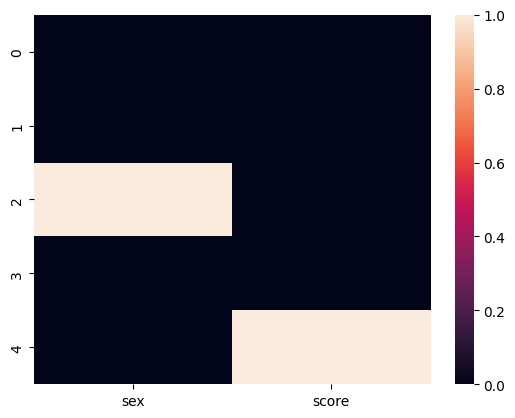

In [21]:
import seaborn as sns

sns.heatmap(df.isnull())

<Axes: >

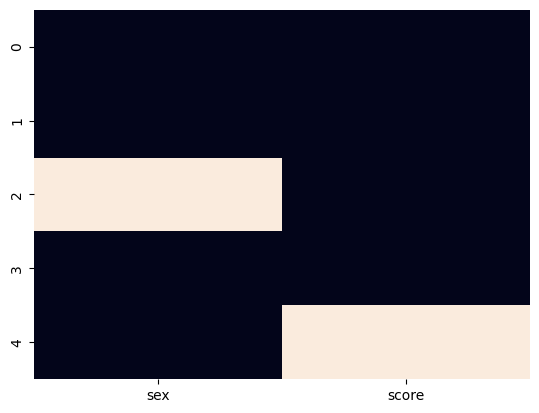

In [22]:
sns.heatmap(df.isnull(), cbar=False)

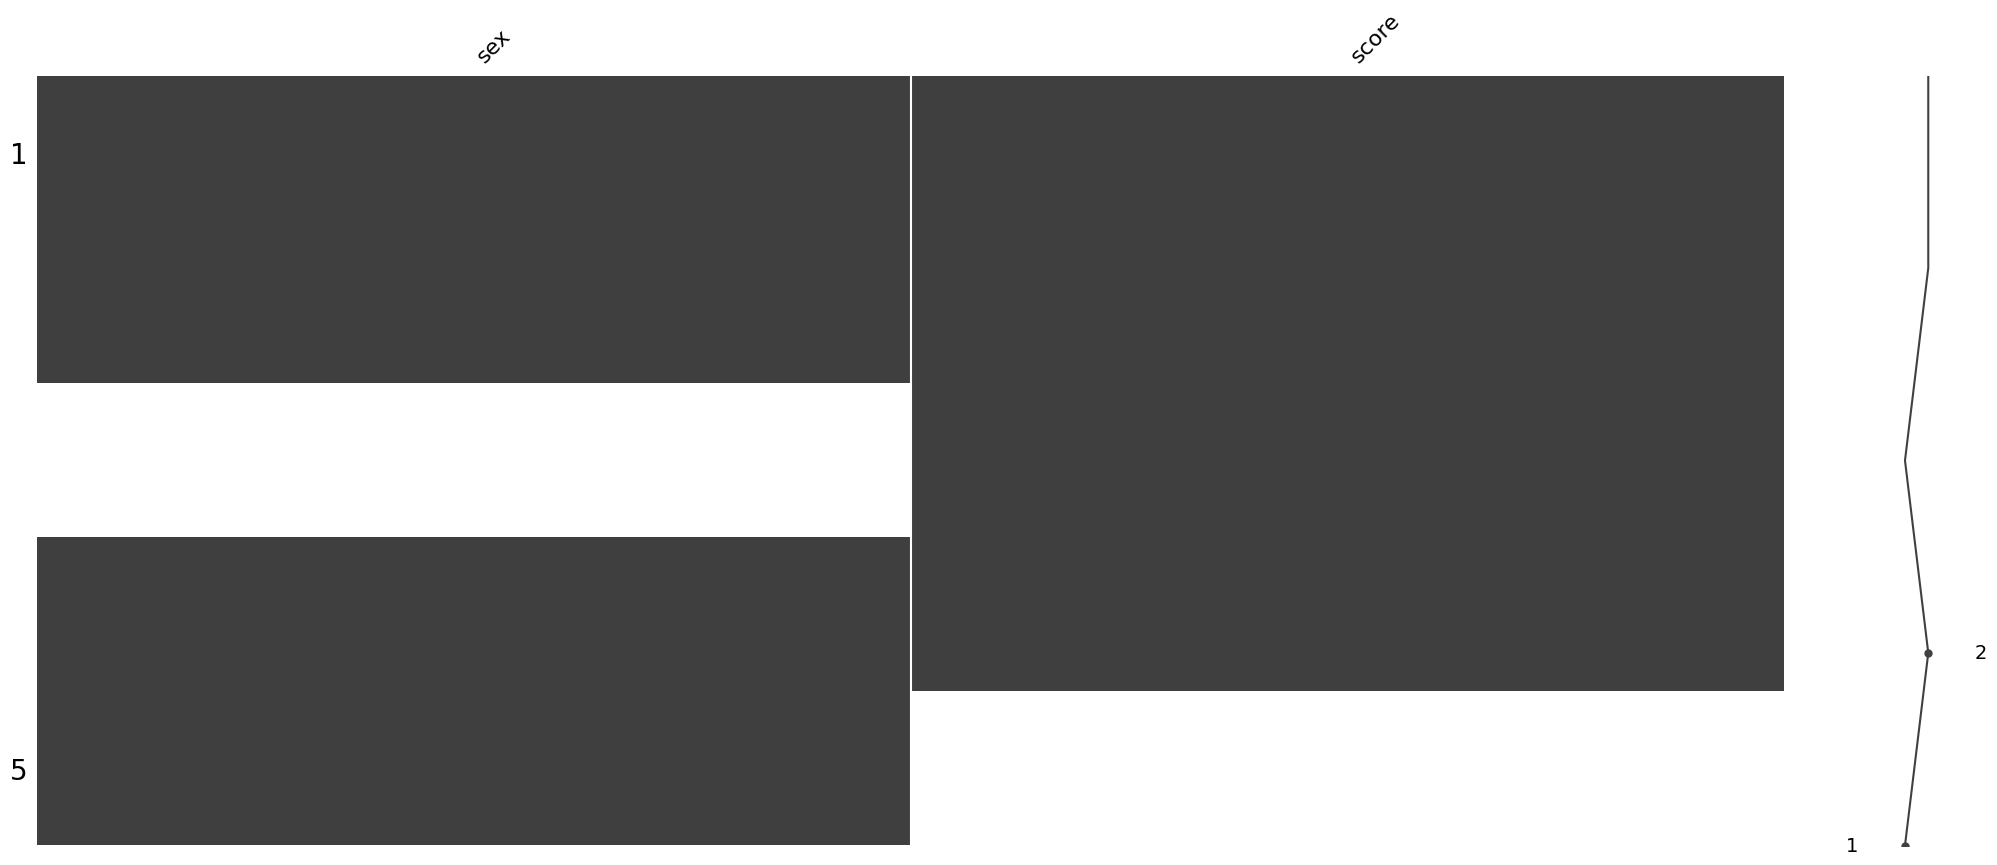

In [23]:
import missingno as msno
msno.matrix(df);

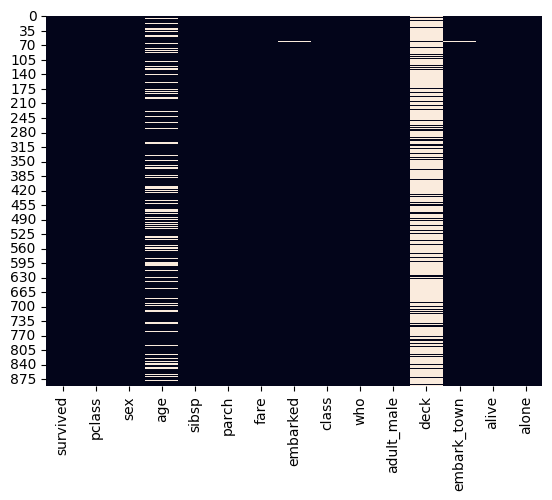

In [24]:
tdf = sns.load_dataset('titanic')
sns.heatmap(tdf.isnull(), cbar=False);

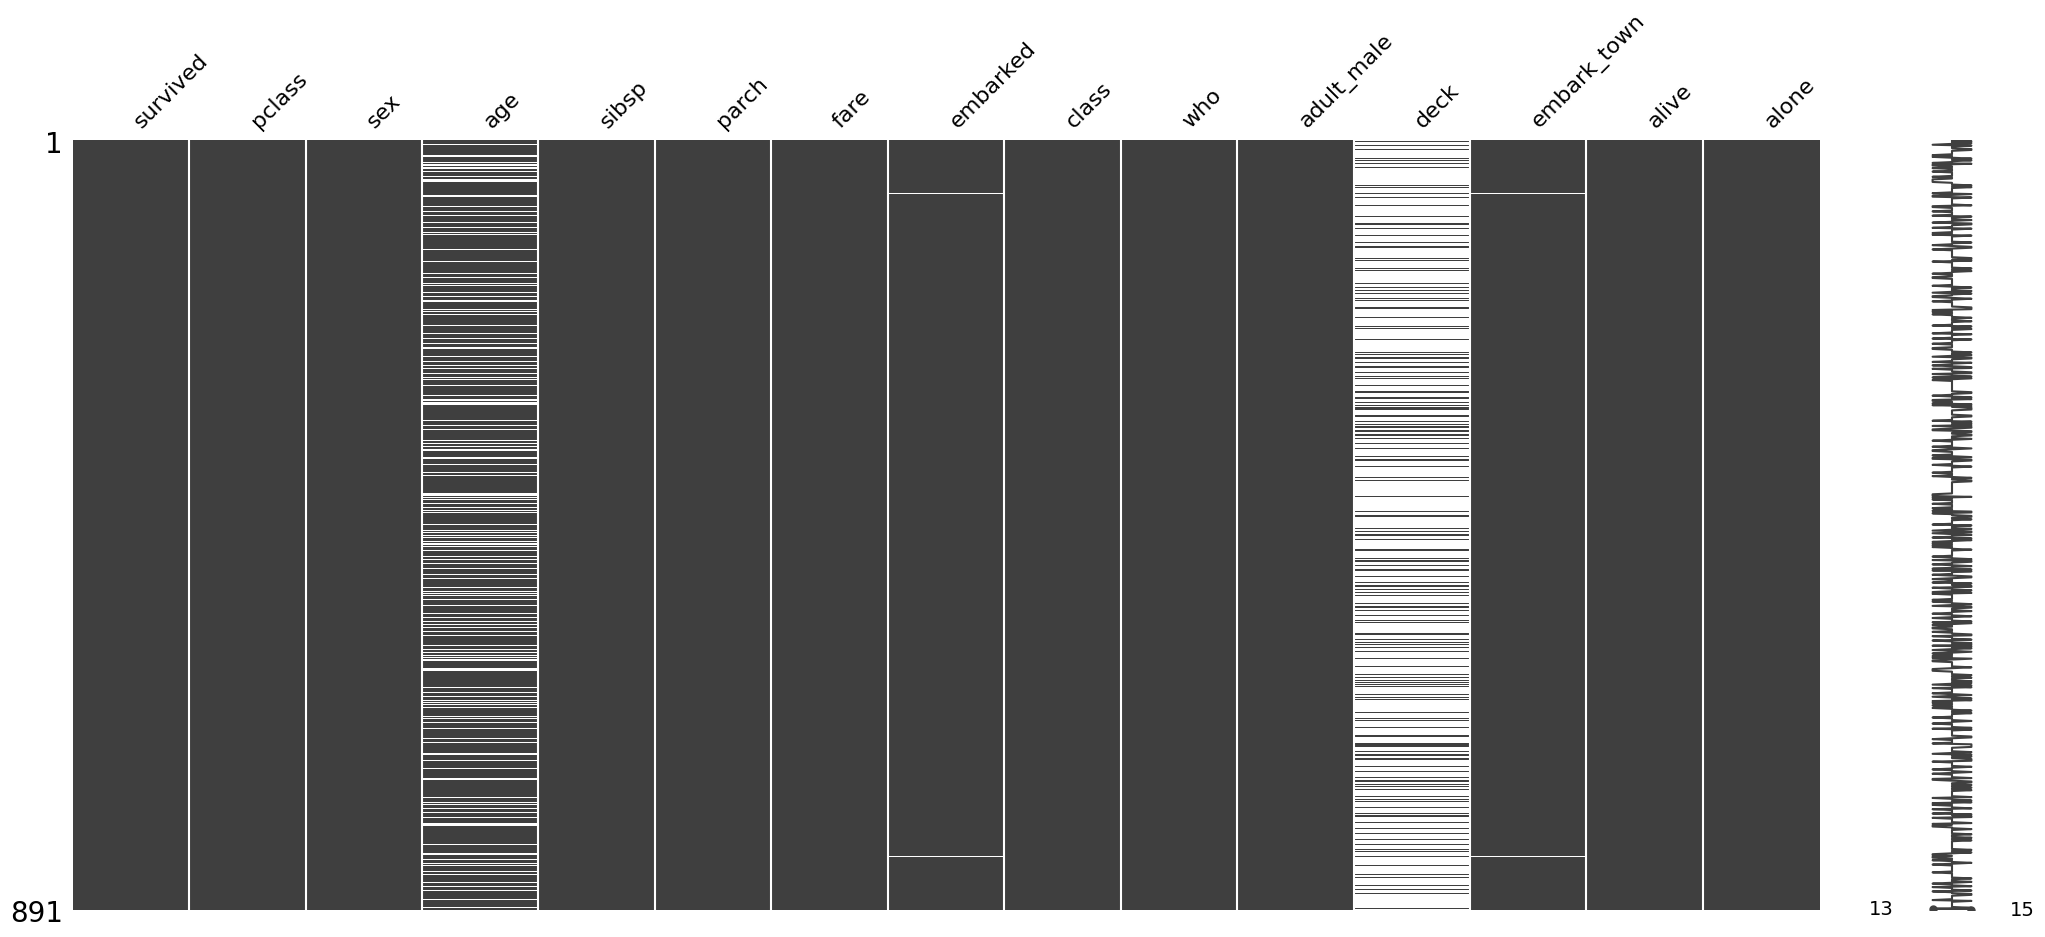

In [26]:
import missingno as msno
msno.matrix(tdf);

- 오른쪽의 스파크라인은 데이터 완성도의 일반적인 모양을 요약하고 데이터 세트에서 최대 및 최소 널링이 있는 행을 가리킵니다.
    - 행마다 15개중 NaN이 아닌 유효한 데이터의 갯수를 나타내고
    - 그 점을 다음 행과 연결한 선

In [27]:
tdf2 = tdf.sample(20)
tdf2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
629,0,3,male,NaN,0,0,7.7333,Q,Third,man,True,NaN,Queenstown,no,True
207,1,3,male,26.0,0,0,18.7875,C,Third,man,True,NaN,Cherbourg,yes,True
104,0,3,male,37.0,2,0,7.9250,S,Third,man,True,NaN,Southampton,no,False
357,0,2,female,38.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,no,True
846,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
727,1,3,female,NaN,0,0,7.7375,Q,Third,woman,False,NaN,Queenstown,yes,True
600,1,2,female,24.0,2,1,27.0000,S,Second,woman,False,NaN,Southampton,yes,False
545,0,1,male,64.0,0,0,26.0000,S,First,man,True,NaN,Southampton,no,True
825,0,3,male,NaN,0,0,6.9500,Q,Third,man,True,NaN,Queenstown,no,True
424,0,3,male,18.0,1,1,20.2125,S,Third,man,True,NaN,Southampton,no,False


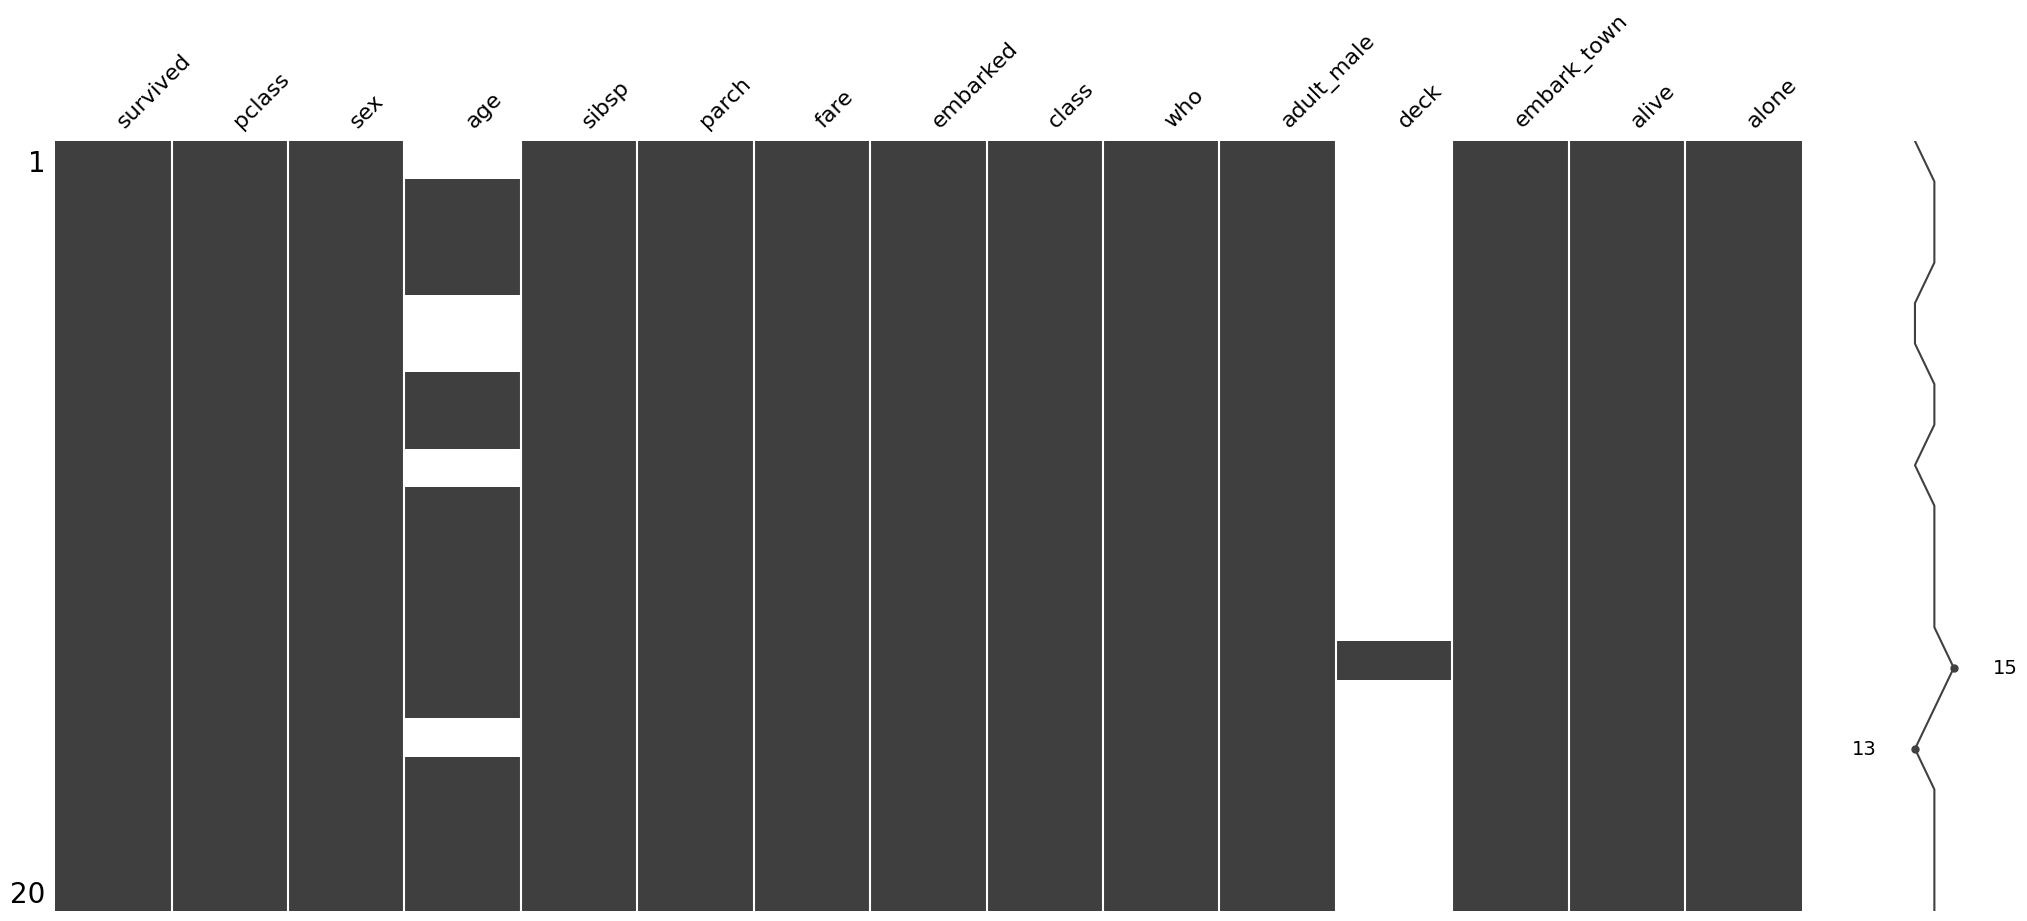

In [28]:
import missingno as msno
msno.matrix(tdf2);

In [32]:
# NaN이 1개인 행을 추출
tdf[tdf.isna().sum(axis=1) == 1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


<Axes: >

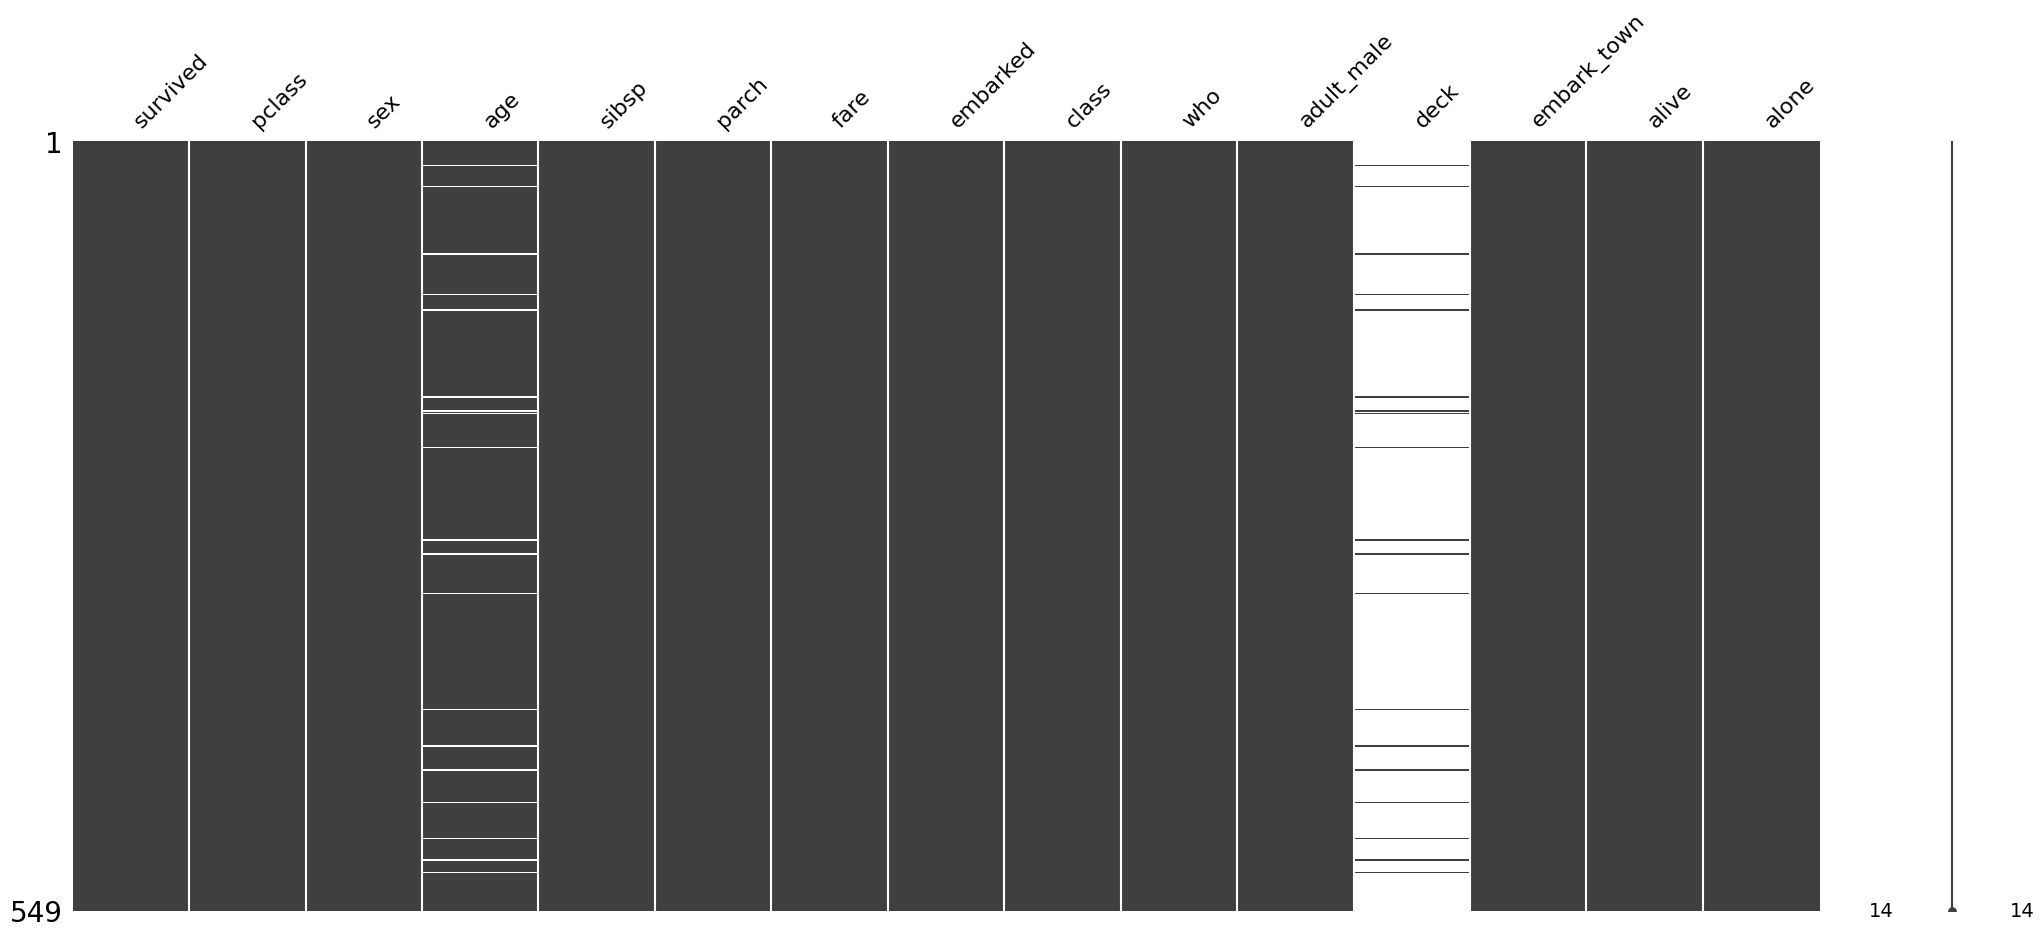

In [33]:
msno.matrix( tdf[tdf.isna().sum(axis=1) == 1] );

In [ ]:
# 1 열이 모두 NaN인 행 추출
tdf[tdf.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [ ]:
# 두 열, age, deck이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.46,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.00,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.22,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.22,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.88,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.23,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.50,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.90,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 세 개 열, age, deck, embark_town이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) & (tdf.embark_town.isna()) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [ ]:
 # 최소한 1개의 NaN에 있는 행 추출
 tdf[tdf.isna( ).any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.46,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.07,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.05,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.12,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False


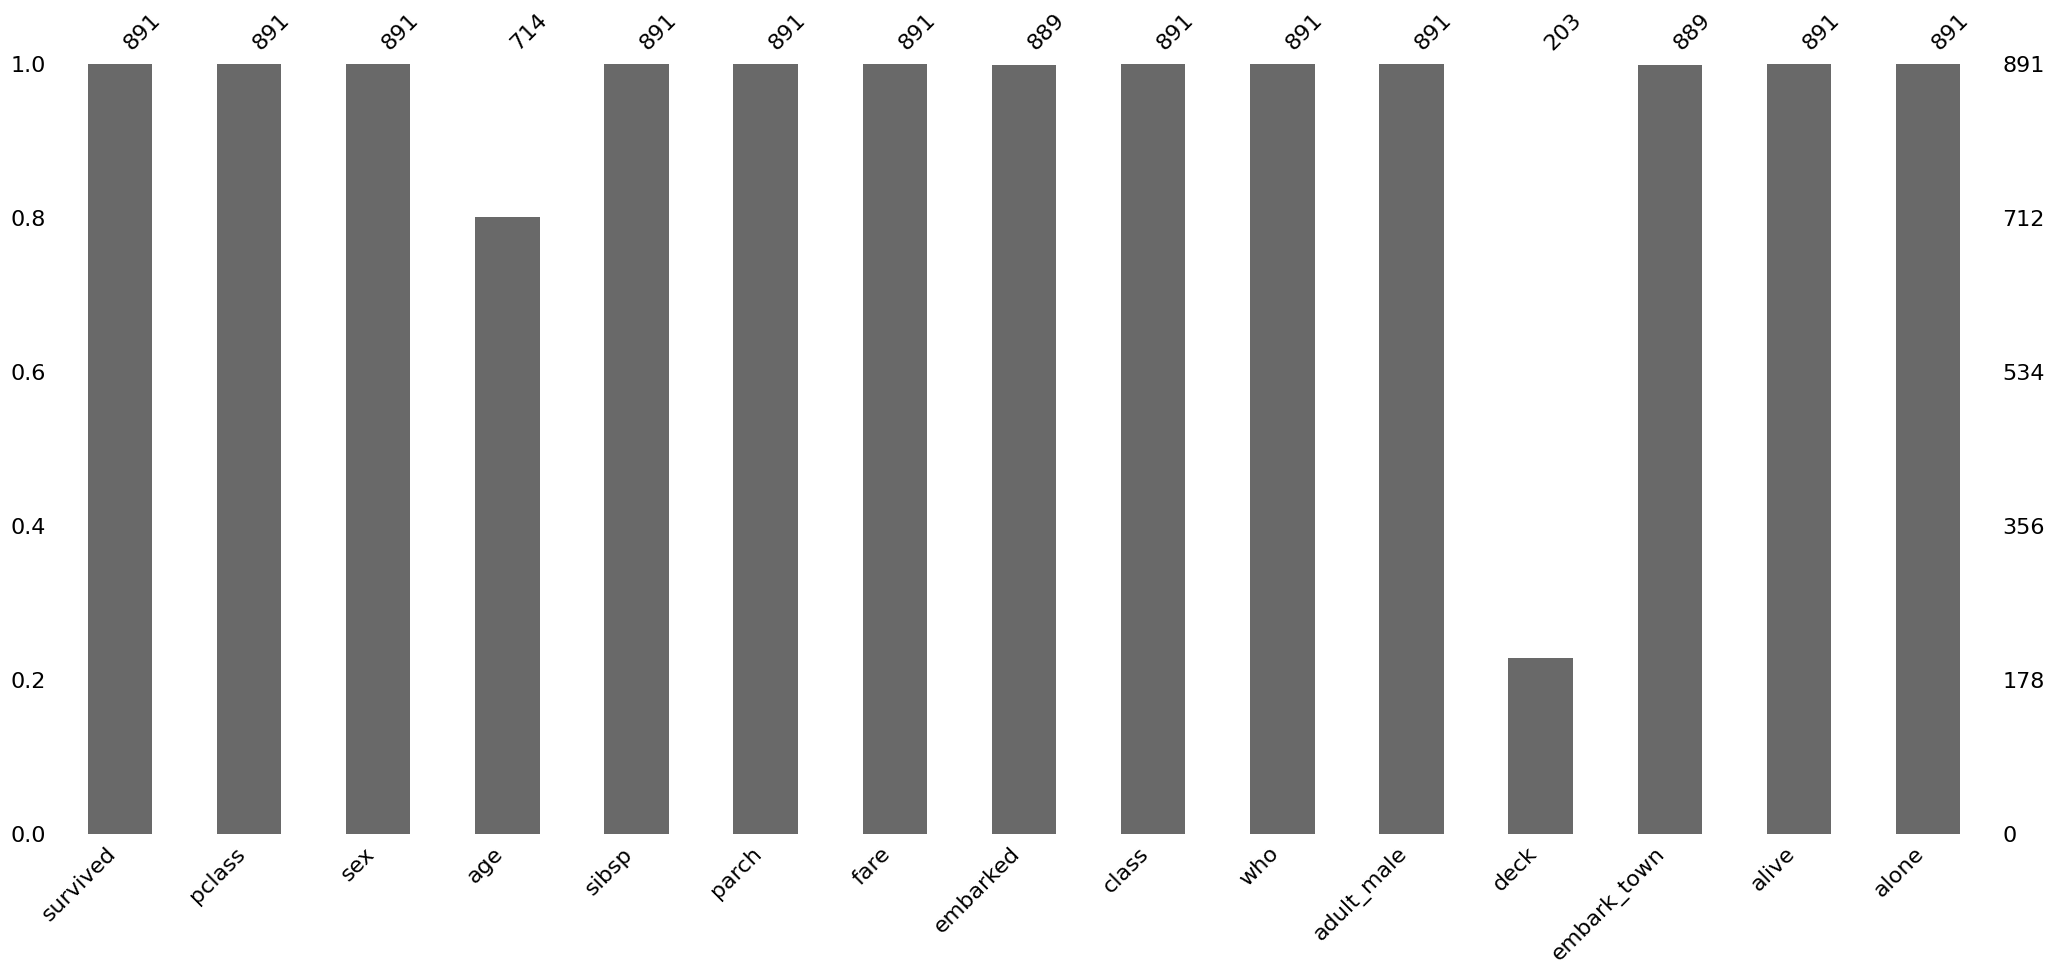

In [ ]:
msno.bar(tdf);

<Axes: >

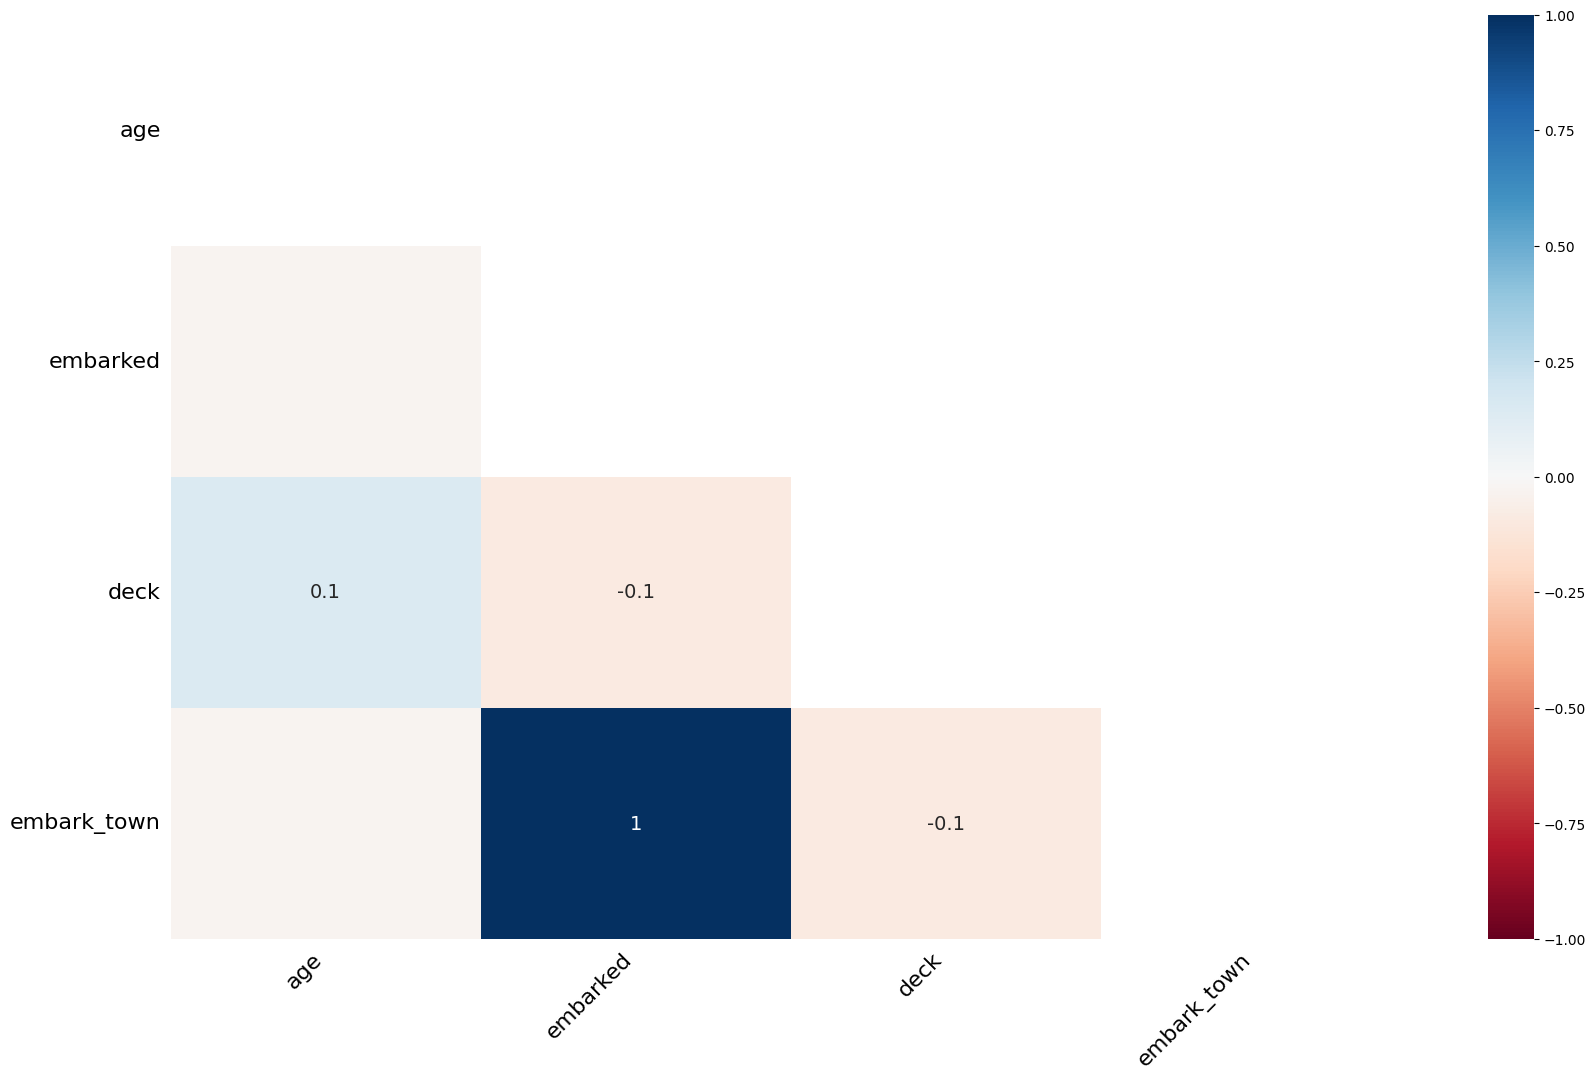

In [ ]:
msno.heatmap(tdf)

### 결측치 제거하기
#### 결측치 있는 행 제거하기

- subset : 열 레이블 또는 레이블 시퀀스(선택 사항)
- 예를 들어 행을 드롭하는 경우, 다른 축인 열을 지정하면 그열에 null이 있는 행을 제거

In [ ]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [ ]:
df.dropna(subset = ['score'])  # score 결측치 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [ ]:
df_nomiss = df.dropna(subset = ['score'])  # score 결측치 제거된 데이터 만들기
df_nomiss['score'] + 1                     # score로 연산

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [ ]:
# 행 2에 NaN이 있으면 열을 제거
df.dropna(subset = [2], axis = 1)

,score
0,5.0
1,4.0
2,3.0
3,4.0
4,NaN


In [ ]:
# 행 3에 NaN이 있으면 열을 제거
df.dropna(subset = [3], axis = 1)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [ ]:
df.dropna() # 하나라도 NaN가 있는 행은 제거

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


#### 여러 변수에 결측치 없는 데이터 추출하기

In [ ]:
# score, sex에서 결측값이 있는 행 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


#### 결측치가 하나라도 있으면 제거하기

In [ ]:
df_nomiss2 = df.dropna()  # 모든 변수에 결측치 없는 데이터 추출
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


------------------------------------------------------------------------
#### (알아 두면 좋아요) 결측치 제거하지 않고 분석하기

In [ ]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [ ]:
df['score'].mean() # 결측값은 제거(무시)하고 계산

4.0

In [ ]:
df['score'].sum() # 결측값은 제거(무시)하고 계산

16.0

In [ ]:
# 결측값은 제거(무시)하고 계산
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


### pandas 문서

In [ ]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman', np.NaN],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip', np.nan],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT, pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaN,NaN,NaT


In [ ]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True
3,True,True,True


In [ ]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [ ]:
df.dropna(axis='columns') # 아무것도 없는 빈 데이터프레임

""
0
1
2
3


In [ ]:
df.dropna(how='all') # 모든 값이 na인 경우, 행 제거

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [ ]:
df.dropna(how='any') # 모든 값이 na인 경우, 행 제거

,name,toy,born
1,Batman,Batmobile,1940-04-25


### 인자 thresh
- thresh: int, optional
- 유효(non-NA) 값이 지정한 것보다 이상이어여 남김(잔류). how와 결합할 수 없습니다.
    - Require that many non-NA values. Cannot be combined with how.

In [ ]:
# Keep only the rows with at least 2 non-NA values.
df.dropna(thresh=2) # 적어도 na가 아닌 값이 2개 이상인 행을 잔류

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [ ]:
# Keep only the rows with at least 2 non-NA values.
df.dropna(thresh=1) # 적어도 na가 아닌 값이 2개 이상인 행을 잔류

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [ ]:
# Keep only the rows with at least 2 non-NA values.
df.dropna(thresh=3) # 유효 값이 3개 이상인 행을 잔류

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [ ]:
df.dropna(thresh=1, how='any') # 오류, 인자 thresh, how 동시 사용 불가

TypeError: You cannot set both the how and thresh arguments at the same time.

In [ ]:
df.dropna(subset=['name', 'toy']) # 지정한 열에서 na인 행을 제거

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [ ]:
df.dropna(subset=['toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [ ]:
df.dropna(subset='toy')

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


SyntaxError: illegal target for annotation (<ipython-input-197-62fd4bfdb234>, line 2)

### 빈 데이터프레임 확인 방법 df.empty

In [ ]:
df1 = pd.DataFrame(index = ['row1', 'row2', 'row3'])
df1

""
row1
row2
row3


In [ ]:
df1.empty

True

In [ ]:
df1 = pd.DataFrame(columns=['col1','col2','col3'])
df1

,col1,col2,col3


In [ ]:
df1.empty

True

In [ ]:
df1 = pd.DataFrame(index = ['row1', 'row2', 'row3'],
                   columns=['col1', 'col2', 'col3'])
df1

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [ ]:
df1.empty

False

In [ ]:
df1 = pd.DataFrame(np.nan,
                  index = ['row1', 'row2', 'row3'],
                  columns=['col1','col2','col3'])
df1

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [ ]:
df1.empty

False

In [ ]:
df1 = pd.DataFrame(2,
                  index = ['row1', 'row2', 'row3'],
                  columns=['col1','col2','col3'])
df1

,col1,col2,col3
row1,2,2,2
row2,2,2,2
row3,2,2,2


False

------------------------------------------------------------------------
### 결측치 대체하기
#### 평균값으로 결측치 대체하기

In [ ]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 5.49 MiB/s, done.


In [ ]:
exam = pd.read_csv('data/exam.csv')      # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [ ]:
exam.loc[[2, 7, 14], ['math']]

,math
2,NaN
7,NaN
14,NaN


In [ ]:
exam.loc[[2, 7, 14], 'math']

2    NaN
7    NaN
14   NaN
Name: math, dtype: float64

In [ ]:
round(exam['math'].mean(), 2)

55.24

In [ ]:
import numpy as np
np.set_printoptions(precision=1)
np.array([np.pi])

array([3.1])

#### 인자 suppress
- True이면 항상 부동 소수점 표기법을 사용하여 부동 소수점 숫자를 출력하며, 이 경우 현재 정밀도에서 0과 같은 숫자는 0으로 출력됩니다.
- False이면 가장 작은 수의 절대값이 < 1e-4이거나 최대값과 최소값의 비율이 > 1e3일 때 과학적 표기법이 사용됩니다.
- 기본값은 False입니다.

In [ ]:
np.set_printoptions(precision=1, suppress = False)
np.array([0.0000001])

array([1.e-07])

In [ ]:
np.set_printoptions(precision=1, suppress = True)
np.array([0.0000001])

array([0.])

In [ ]:
round(np.pi, 2)

3.14

In [ ]:
exam['math'] = exam['math'].fillna(100)  # math가 NaN이면 55로 대체
exam                                    # 출력

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,100.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,100.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [ ]:
exam = pd.read_csv('data/exam.csv')      # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [ ]:
pd.set_option('display.precision', 2)
exam['math'] = exam['math'].fillna(exam['math'].mean())  # math가 NaN이면 55로 대체
exam                                    # 출력

,id,nclass,math,english,science
0,1,1,50.00,98,50
1,2,1,60.00,97,60
2,3,1,55.24,86,78
3,4,1,30.00,98,58
4,5,2,25.00,80,65
5,6,2,50.00,89,98
6,7,2,80.00,90,45
7,8,2,55.24,78,25
8,9,3,20.00,98,15
9,10,3,50.00,98,45


In [ ]:
exam['math'].isna().sum()  # 결측치 빈도 확인

0

---
## 07-2 이상한 데이터를 찾아라! - 이상치 정제하기
### 이상치 제거하기 - 존재할 수 없는 값

In [ ]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


#### 이상치 확인하기

In [ ]:
df['sex'].value_counts()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [ ]:
df['sex'].value_counts().sort_index()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [ ]:
df['score'].value_counts()

score
4    2
5    1
3    1
2    1
6    1
Name: count, dtype: int64

In [ ]:
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

#### 결측 처리하기

In [ ]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [ ]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [ ]:
# sex, score 결측치 제거
# sex별 분리
# score 평균 구하기
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


------------------------------------------------------------------------
#### (알아 두면 좋아요) `np.where()`는 문자와 `NaN`을 함께 반환할 수 없습니다.

In [ ]:
df = pd.DataFrame([1])
df

,0
0,1


In [ ]:
df = pd.DataFrame([1, 1, 2, 2])
df

,0
0,1
1,1
2,2
3,2


In [ ]:
df = pd.DataFrame([[1, 1, 2, 2]])
df

,0,1,2,3
0,1,1,2,2


In [ ]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)  # 조건에 맞으면 문자 부여
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [ ]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [ ]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)  # 조건에 맞으면 문자열 부여
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [ ]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [ ]:
# 결측치로 만들 값에 문자 부여
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [ ]:
# 'etc'를 NaN으로 바꾸기
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [ ]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [ ]:
df2 = df.fillna(10)
df2

,x1,x2
0,1,a
1,1,a
2,2,10
3,2,10


In [ ]:
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [ ]:
type(df2.loc[2, 'x2'])

int

------------------------------------------------------------------------
### 이상치 제거하기 - 극단적인 값

#### 상자 그림으로 극단치 기준 정하기

##### 1. 상자 그림 살펴보기

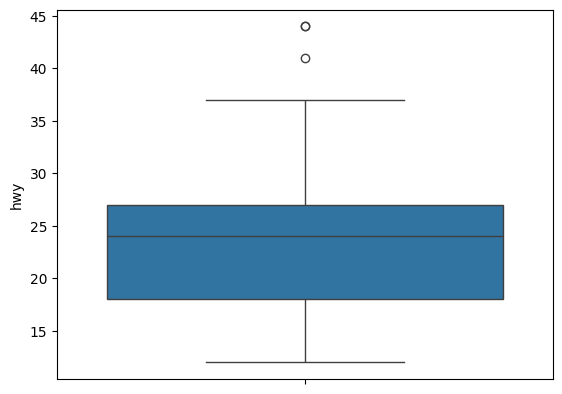

In [ ]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy');

##### 2.극단치 기준값 구하기

**(1) 1사분위수, 3사분위수 구하기**

In [ ]:
s = pd.Series([1, 2, 3, 4, 5])

In [ ]:
s.quantile(.25)

2.0

In [ ]:
s.quantile(.50)

3.0

In [ ]:
s.quantile([.25, .5, .75, 1])

0.25    2.0
0.50    3.0
0.75    4.0
1.00    5.0
dtype: float64

In [ ]:
s = pd.Series([1, 2, 4, 5])

In [ ]:
s.quantile(.25)

1.75

In [ ]:
s.quantile(.50)

3.0

In [ ]:
s.quantile([.25, .5, .75, 1])

0.25    1.75
0.50    3.00
0.75    4.25
1.00    5.00
dtype: float64

In [ ]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [ ]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

**(2) IQR 구하기**

In [ ]:
iqr = pct75 - pct25
iqr

9.0

**(3) 하한, 상한 구하기**

In [ ]:
pct25 - 1.5 * iqr  # 하한

4.5

In [ ]:
pct75 + 1.5 * iqr  # 상한

40.5

### describe() 메소드

In [ ]:
mpg['hwy'].describe()

count    234.00
mean      23.44
std        5.95
min       12.00
25%       18.00
50%       24.00
75%       27.00
max       44.00
Name: hwy, dtype: float64

In [ ]:
mpg['hwy'].describe()['25%']

18.0

## 결측값 확인

In [ ]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

<Axes: >

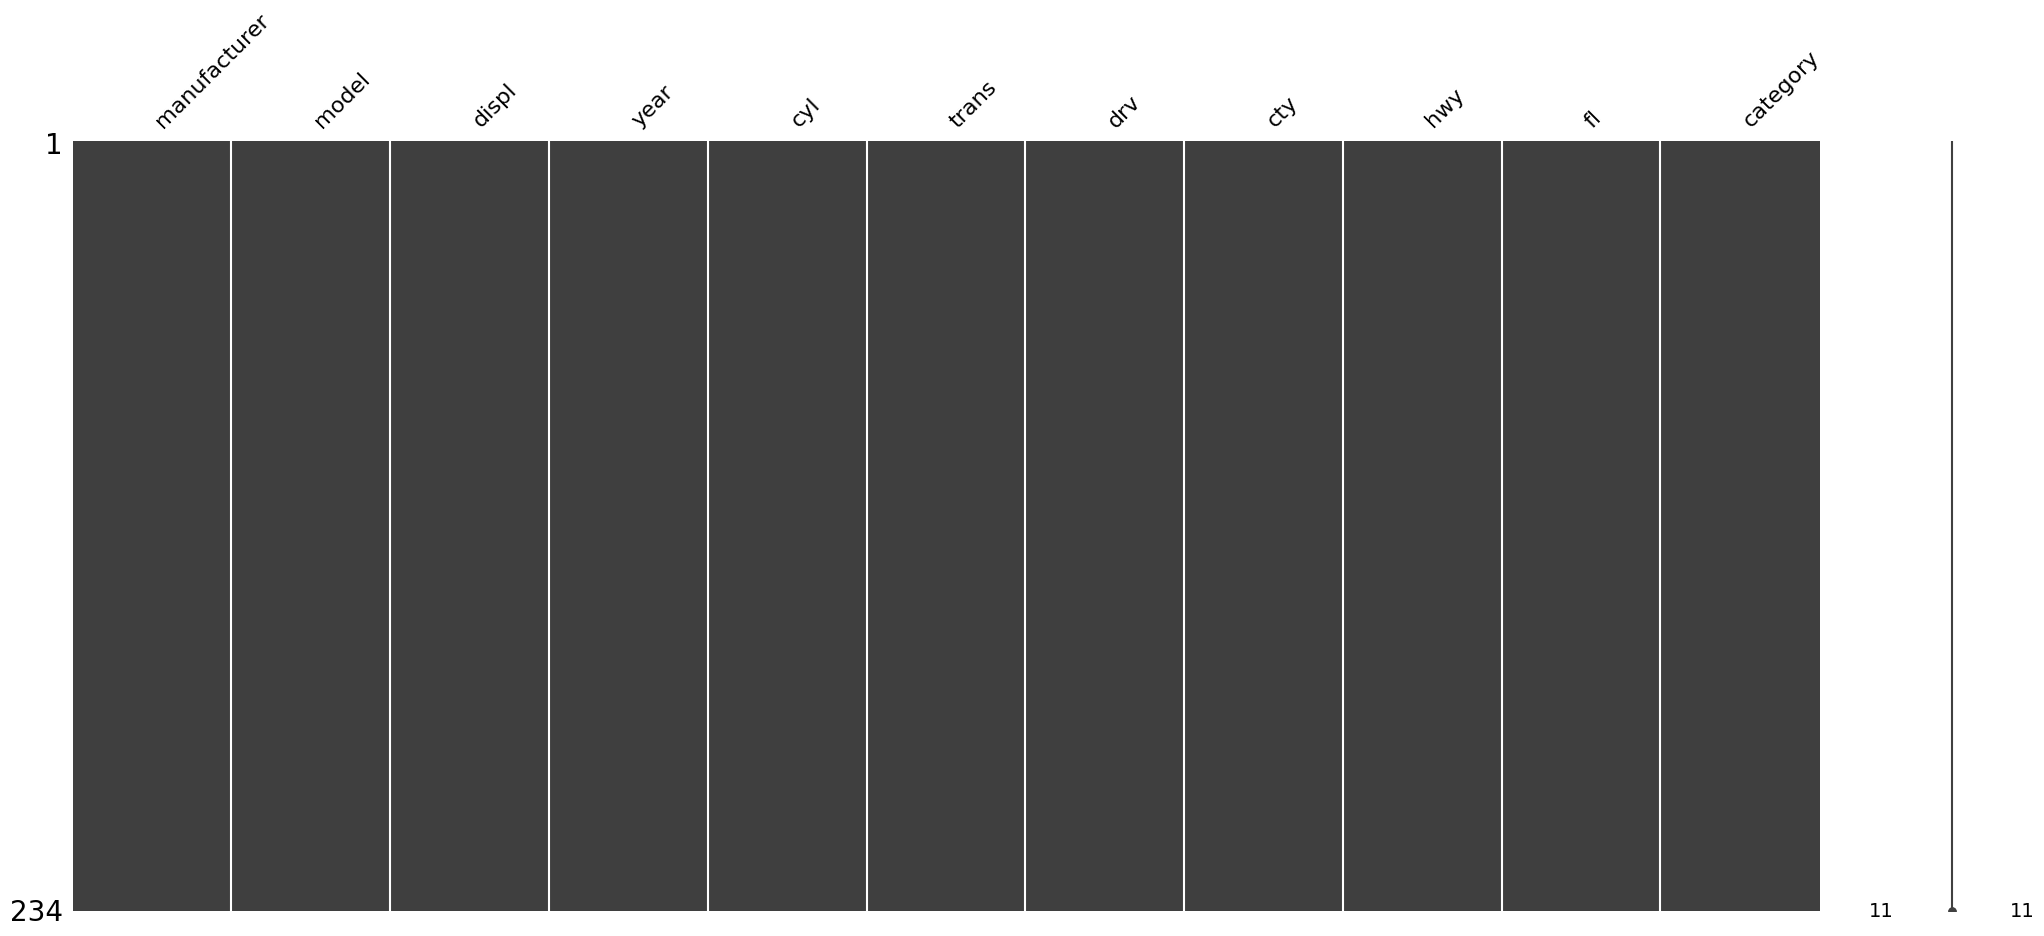

In [ ]:
import missingno as msno
msno.matrix(mpg);

#### 3. 극단치를 결측 처리하기

In [ ]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

##### 4. 결측치 제거하고 분석하기

In [ ]:
dmpg = mpg.dropna(subset = ['hwy'])
len(dmpg)

231

In [ ]:
# hwy 결측치 제거
# drv별 분리
# hwy 평균 구하기
dmpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [ ]:
len(mpg)

234

In [ ]:
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


### 정리하기

In [ ]:
## 1. 결측치 정제하기
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
pd.isna(df).sum()                                 # 결측치 확인
df_nomiss = df.dropna(subset = ['score'])         # 결측치 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])  # 여러 변수 동시에 결측치 제거


## 2. 이상치 정제하기

# 이상치 확인
df['sex'].value_counts(sort = False)

# 이상치 결측 처리
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

# 상자 그림으로 극단치 기준값 찾기
pct25 = mpg['hwy'].quantile(.25)  # 1사분위수
pct75 = mpg['hwy'].quantile(.75)  # 3사분위수
iqr = pct75 - pct25               # IQR
pct25 - 1.5 * iqr                 # 하한
pct75 + 1.5 * iqr                 # 상한

# 극단치 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

### **보충학습**

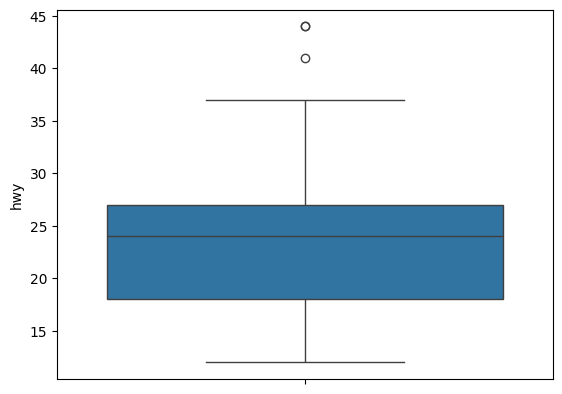

In [ ]:
mpg = pd.read_csv('data/mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy');

In [ ]:
def outlier_iqr(data, column):
    # lower, upper 글로벌 변수 선언하기
    global lower, upper

    # 4분위수 기준 지정하기
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)

    # IQR 계산하기
    iqr = q75 - q25

    # outlier cutoff 계산하기
    cut_off = iqr * 1.5

    # lower와 upper bound 값 구하기
    lower, upper = q25 - cut_off, q75 + cut_off

    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기
    data1 = data[data[column] > upper][column]
    data2 = data[data[column] < lower][column]
    print(data1)
    print(data2)
    print('\nIQR:',iqr, 'lower bound:', lower, 'upper bound:', upper)

    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [ ]:
outlier_iqr(mpg, "hwy")

212    44
221    44
222    41
Name: hwy, dtype: int64
Series([], Name: hwy, dtype: int64)

IQR: 9.0 lower bound: 4.5 upper bound: 40.5
총 이상치 개수는 3 이다.


In [ ]:
#사분위수 구하기
q1 = mpg['hwy'].quantile(0.25)
q2 = mpg['hwy'].quantile(0.5)
q3 = mpg['hwy'].quantile(0.75)
q4 = mpg['hwy'].quantile(1)

# IQR값 구하기
iqr = q3-q1

#이상치값 구하기
mpg[(mpg['hwy'] < q1-1.5 * iqr) | (mpg['hwy'] > q3+1.5 * iqr)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
